In [2]:
import requests
from pprint import pprint
from PIL import Image
import os
import shutil
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def process_image(input_path):
    with open(input_path, 'rb') as f:
        r = requests.post('http://127.0.0.1:5000/api/v1/segmentation/opticdisk', files = {'file': ('0792_test.tif', f, 'image/tiff', {'Expires': '0'})})
        print(r)    
        if r.status_code != 200:
            raise ValueError("Unexpected result")
            
        outputFileName = r.content
        return outputFileName

In [10]:
def read_gif_by_cv2(pathIn):
    cap = cv2.VideoCapture(pathIn)
    ret, image = cap.read()
    cap.release()
    return image

In [11]:
def load_from_pickle(pathIn):
    ar_file = open(pathIn, "rb")
    res = pickle.load(ar_file)
    ar_file.close()
    return res

In [12]:
def dump_to_pickle(obj, target_path):
    target_file = open(target_path, 'wb')
    pickle.dump(obj, target_file)
    target_file.close()

In [13]:
def compare_images_cv2_fast(cv2image1, cv2image2):
    
    rows1,cols1,_ = cv2image1.shape
    rows2,cols2,_ = cv2image2.shape
    
    if rows1 != rows2 or cols1 != cols2:
        print(rows1)
        print(rows2)
        print(cols1)
        print(cols2)
        raise ValueError("Images have different size")
        
    cv2image1int = cv2image1.astype(int)
    cv2image2int = cv2image2.astype(int)
    
    all_count = cv2image1int.shape[0] * cv2image1int.shape[1]
    diff = (cv2image1int - cv2image2int)
    diff = np.abs(diff)
    diff_sum = diff.sum() / (255 * cv2image1int.shape[2])
    equal_count = (np.sign((cv2image1.astype(int) - cv2image2.astype(int))) == 0).astype(int).sum() / cv2image1int.shape[2]
    
    return (equal_count, diff_sum, all_count, equal_count + diff_sum)
    

In [14]:
input_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/'
expected_result_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/'

In [15]:
output_dir = 'd:/Dane/test_out/'

In [21]:
files = os.listdir(input_dir)
res_map = {}
for file_name in files:
    expected_result_file = file_name
    full_file_name = input_dir +file_name
    expected_result_file = expected_result_file.replace('_training.tif', '_manual1.gif')
    full_expected_result_file = expected_result_dir + expected_result_file
    output_file = process_image(full_file_name)
    res_map[file_name] = (full_file_name, output_file, full_expected_result_file)
    print(res_map[file_name])

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0001_training.tif', b'd:/Fundus/uploads\\55fbfd52-3529-42ee-b6d6-09c92dcafd3b.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0001_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0002_training.tif', b'd:/Fundus/uploads\\e793eca1-6fbc-4f60-a382-fae13a2ea976.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0002_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0003_training.tif', b'd:/Fundus/uploads\\c09e11f3-94a0-4c0d-8af8-e97ed02f6ca8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0003_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0004_training.tif', b'd:/Fundus/uploads\\7cda40d3-ffbe-4d7b-98b3-184875fac48b.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0033_training.tif', b'd:/Fundus/uploads\\d640dd73-2527-496c-b6a0-f2efe957c94e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0033_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0034_training.tif', b'd:/Fundus/uploads\\bec02bb7-8d79-4b75-8a25-9d9c59937bac.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0034_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0035_training.tif', b'd:/Fundus/uploads\\4de0d7b6-090e-4fd3-9885-681172567940.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0035_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0036_training.tif', b'd:/Fundus/uploads\\b1e4bac7-0423-4c70-ad1e-79acb11053a8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0065_training.tif', b'd:/Fundus/uploads\\06aa56cc-56ed-4fcc-a250-a58fe88219f9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0065_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0066_training.tif', b'd:/Fundus/uploads\\2da8fb02-6058-4147-80ca-31ba425d8561.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0066_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0067_training.tif', b'd:/Fundus/uploads\\feae327b-877c-4b16-8b13-7cc10c8409bb.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0067_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0068_training.tif', b'd:/Fundus/uploads\\513d154f-d408-4008-8e56-a6875b451e7e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0097_training.tif', b'd:/Fundus/uploads\\1b517f9a-57a1-4e1a-add6-1c0c0b7953c3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0097_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0098_training.tif', b'd:/Fundus/uploads\\b0ddc7d3-7c81-40bc-b803-5ea8aa9a6bcd.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0098_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0099_training.tif', b'd:/Fundus/uploads\\20708422-9180-4800-b7d3-8d805d621b68.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0099_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0100_training.tif', b'd:/Fundus/uploads\\af507d8e-fb4d-4d84-9c91-fff6a96d50f6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0129_training.tif', b'd:/Fundus/uploads\\1d98055a-aa51-4a73-a277-1eed11e30bec.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0129_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0130_training.tif', b'd:/Fundus/uploads\\cdad7bf7-21d0-48f4-9a5f-b62800679012.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0130_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0131_training.tif', b'd:/Fundus/uploads\\472f2265-a899-4b19-bf72-622d09c435b9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0131_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0132_training.tif', b'd:/Fundus/uploads\\7cd715e9-664d-4187-9f88-f309974e2705.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0161_training.tif', b'd:/Fundus/uploads\\6fae8c4a-632b-436d-a297-63e509cdae6d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0161_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0162_training.tif', b'd:/Fundus/uploads\\dead502a-db1c-483c-a166-bb02a56c6926.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0162_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0163_training.tif', b'd:/Fundus/uploads\\4de9fbb7-f13b-4c56-a7a5-12ba9d6147e0.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0163_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0164_training.tif', b'd:/Fundus/uploads\\5a55ec08-2f60-4717-847c-c5d7bf69a568.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0193_training.tif', b'd:/Fundus/uploads\\a978dd77-17cb-4518-9ca9-d86334f81de7.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0193_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0194_training.tif', b'd:/Fundus/uploads\\3be67221-df60-421d-a308-345ac2d5efe2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0194_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0195_training.tif', b'd:/Fundus/uploads\\5e01e394-e116-47ac-988a-b860251ca7a2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0195_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0196_training.tif', b'd:/Fundus/uploads\\e7d41e11-d159-480c-837e-a03d51927a13.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0225_training.tif', b'd:/Fundus/uploads\\cbf928c1-6cab-4964-a727-71498d671a38.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0225_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0226_training.tif', b'd:/Fundus/uploads\\3444fb82-e639-4a96-9e08-9e340e677f02.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0226_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0227_training.tif', b'd:/Fundus/uploads\\d631c120-7da4-4aef-8ac6-26e4750a7d59.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0227_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0228_training.tif', b'd:/Fundus/uploads\\d95c112c-ca12-48d4-8a2b-aa029fc09b8e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0257_training.tif', b'd:/Fundus/uploads\\45b2da49-d7fb-4563-aaeb-abbaea701c3e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0257_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0258_training.tif', b'd:/Fundus/uploads\\8511c14c-5eaa-4e9d-8f66-a06310bb69a6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0258_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0259_training.tif', b'd:/Fundus/uploads\\7e06e87c-c8d2-4d35-89bb-3ad0947aaaf1.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0259_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0260_training.tif', b'd:/Fundus/uploads\\fcfdefbb-0afb-46c9-8915-c3ced4546bd5.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0289_training.tif', b'd:/Fundus/uploads\\f977e6b0-fa1e-4229-a8b7-7c914d69811e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0289_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0290_training.tif', b'd:/Fundus/uploads\\7c61f79e-f7ed-46dd-a43d-4257e573f942.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0290_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0291_training.tif', b'd:/Fundus/uploads\\895cc3c8-af5f-44b5-bfdf-bf165b907759.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0291_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0292_training.tif', b'd:/Fundus/uploads\\a111381b-c3a5-43c0-95bc-e4880209ba5e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0321_training.tif', b'd:/Fundus/uploads\\6178758a-7a46-4519-b408-13c49e495dcf.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0321_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0322_training.tif', b'd:/Fundus/uploads\\185d845e-a368-4cd3-88ae-bf42dc2bbaeb.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0322_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0323_training.tif', b'd:/Fundus/uploads\\5df630e8-1653-434c-a0a4-28d91acc7d55.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0323_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0324_training.tif', b'd:/Fundus/uploads\\53bbbd38-a9ce-4f82-b5f7-bc002a4a4bac.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0353_training.tif', b'd:/Fundus/uploads\\24fe99eb-275c-489b-8578-b4ad8e077297.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0353_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0354_training.tif', b'd:/Fundus/uploads\\6b82b1b9-1fc8-47f2-a294-8af71ec9987c.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0354_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0355_training.tif', b'd:/Fundus/uploads\\55f9e206-4bd0-43cc-9756-fc484b7d0be3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0355_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0356_training.tif', b'd:/Fundus/uploads\\863ccf05-0e0f-4088-8a91-c8705d4032ea.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0385_training.tif', b'd:/Fundus/uploads\\d98f3a90-b68e-4876-b377-945d00ae9d0e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0385_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0386_training.tif', b'd:/Fundus/uploads\\2d4d5e2a-f2a8-4a7d-9262-29f0298970a4.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0386_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0387_training.tif', b'd:/Fundus/uploads\\d8387d9c-56d5-40db-ab41-149ad9f04fa3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0387_training.tif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0388_training.tif', b'd:/Fundus/uploads\\84ec4e9a-9b1b-4287-bb90-3fe395921ca8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training

In [16]:
res_map = load_from_pickle('d:/res_map.pickle')

In [17]:
res_values = [v for v in res_map.values()]

In [18]:
res_values

[('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0001_training.tif',
  b'd:/Fundus/uploads\\55fbfd52-3529-42ee-b6d6-09c92dcafd3b.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0001_training.tif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0002_training.tif',
  b'd:/Fundus/uploads\\e793eca1-6fbc-4f60-a382-fae13a2ea976.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0002_training.tif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0003_training.tif',
  b'd:/Fundus/uploads\\c09e11f3-94a0-4c0d-8af8-e97ed02f6ca8.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0003_training.tif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0004_training.tif',
  b'd:/Fundus/uploads\\7cda40d3-ffbe-4d7b-98b3-184875fac48b.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0004_training.tif'),
 ('c:/Users/

In [19]:
all_results = {}
images_cache = {}
all_count = 0

for ix in range(1, 20):
    print('Checking treshold ' + str(ix))
    all_results[ix] = []
    
    kernel = np.ones((ix, ix), np.uint8)
    
    for im in res_values:
        _, pr, ex = im
        ex = ex.replace('_training.tif', '_manual1.gif')
        pr = pr.decode("utf-8")
        #print(ex)
        #print(pr)
        
        if ex in images_cache:
            exp_img = images_cache[ex]
        else:
            exp_img = read_gif_by_cv2(ex)
            images_cache[ex] = exp_img
        
        img = cv2.imread(pr)
        img_erode = cv2.erode(img, kernel, iterations=1)
        img_dilate = cv2.dilate(img_erode, kernel, iterations=1)
                
        ret_val, img_out = cv2.threshold(img_dilate, 98, 255, cv2.THRESH_BINARY)

        comparison_result = compare_images_cv2_fast(exp_img, img_out)
        all_results[ix].append(comparison_result)
        all_count = all_count + 1
        if all_count % 100 == 0:
            print('all count ' + str(all_count))

Checking treshold 1
all count 100
all count 200
all count 300
all count 400
Checking treshold 2
all count 500
all count 600
all count 700
all count 800
Checking treshold 3
all count 900
all count 1000
all count 1100
all count 1200
Checking treshold 4
all count 1300
all count 1400
all count 1500
all count 1600
Checking treshold 5
all count 1700
all count 1800
all count 1900
all count 2000
Checking treshold 6
all count 2100
all count 2200
all count 2300
all count 2400
Checking treshold 7
all count 2500
all count 2600
all count 2700
all count 2800
Checking treshold 8
all count 2900
all count 3000
all count 3100
all count 3200
Checking treshold 9
all count 3300
all count 3400
all count 3500
all count 3600
Checking treshold 10
all count 3700
all count 3800
all count 3900
all count 4000
Checking treshold 11
all count 4100
all count 4200
all count 4300
all count 4400
Checking treshold 12
all count 4500
all count 4600
all count 4700
all count 4800
Checking treshold 13
all count 4900
all count 

In [20]:
dump_to_pickle(all_results, 'd:/all_erode_dilate_treshold_results.pickle')

In [21]:
all_ratios = []
ixs = []

for k in all_results.keys():
    res = all_results[k]
    correct_sum = 0
    all_sum = 0
    ixs.append(k)
    for t in res:
        correct_sum = t[0]
        all_sum = t[2]
    ratio = correct_sum * 1.0 / all_sum
    all_ratios.append(ratio)

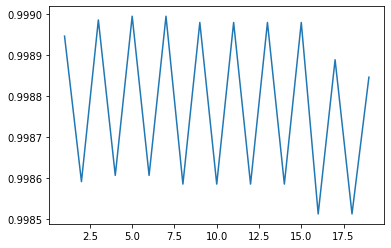

In [23]:
plt.plot(ixs, all_ratios)

In [28]:
filtered_ratios = [all_ratios[ix] for ix in ixs if ix % 2 == 0]
filtered_ixs = [ix for ix in ixs if ix % 2 == 0]

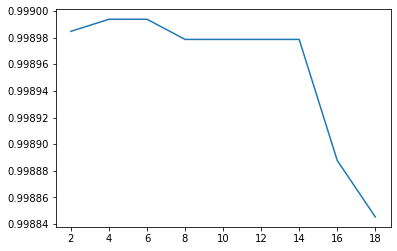

In [29]:
plt.plot(filtered_ixs, filtered_ratios)

In [24]:
np.argmax(all_ratios)

4

In [27]:
img = cv2.imread('c:/Users/ax/retina-unet-master-disc/test/all_predictions.png')
img_erode = cv2.erode(img, kernel, iterations=1)
img_dilate = cv2.dilate(img_erode, kernel, iterations=1)
ret_val, img_out = cv2.threshold(img_dilate, 98, 255, cv2.THRESH_BINARY)
cv2.imwrite('c:/Users/ax/retina-unet-master-disc/test/all_predictions_erode_dilate_treshold.png', img_out) 

True

In [26]:
all_ratios[np.argmax(all_ratios)]

0.998993817432416

In [ ]:
#treshold 98